### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
##### The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.



#### Also, determine the optimal value of lambda for ridge and lasso regression.

 
### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1934]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [1935]:
pd.set_option("max_rows", 100)
pd.set_option("max_columns", 100)

In [1936]:
house_df = pd.read_csv("./train.csv")
house_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

### Step 1:  Data Overview

In [1937]:
house_df.shape

(1460, 81)

In [1938]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1939]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1940]:
house_df.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [1941]:
round(house_df.isnull().sum()*100/len(house_df.index), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

### Step 2: Data Cleaning

We observe 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature' these columns has lot of missing values,
but when inspected closely, we can see, 

'Alley': NA  => means "No alley access"  and its not actually missing
'FireplaceQu': NA =>	No Fireplace
'PoolQC': NA =>	No Pool
'Fence': NA	=> No Fence

Hence, I choose to impute then instead of dropping them

In [1942]:
# drop Id
house_df.drop("Id", axis = 1, inplace = True)

In [1943]:
house_df.shape

(1460, 80)

In [1944]:
cols = ['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence']
for col in cols:
    print("\n\n")
    print("Column: ", col)
    print(house_df[col].value_counts())
    print("\n\n")
    print("-" *100)




Column:  LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64



----------------------------------------------------------------------------------------------------



Column:  Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64



----------------------------------------------------------------------------------------------------



Column:  FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64



----------------------------------------------------------------------------------------------------



Column:  PoolQC
Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64



----------------------------------------------------------------------------------------------------



Column:  Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64



-------------------------------

In [1945]:
# acc to data dictionary --> 
# in most of the cases NA means typical or not available i.e. meanigfull missing

for col in ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical",
            "Fence", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "MasVnrType", 
            "MiscFeature", "PoolQC"]:
    house_df[col] = house_df[col].fillna("Not_Available")

    
    
    
for col in ["MasVnrArea", "GarageYrBlt"]:
    house_df[col] = house_df[col].fillna(0)

In [1946]:
# acc to data dictionary -->  Linear feet of street connected to property
# So it makes sense to fill in missing value by the median LotFrontage of the neighborhood

house_df["LotFrontage"] = house_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [1948]:
round(house_df.isnull().sum()*100/len(house_df.index), 2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

### Checking the distribution of target variable

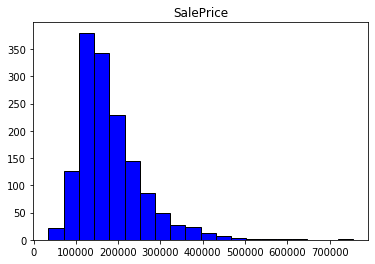

In [1949]:
y = house_df['SalePrice']
plt.title('SalePrice')
plt.hist(y, color = "b", bins = 20, ec = "black")
plt.show()

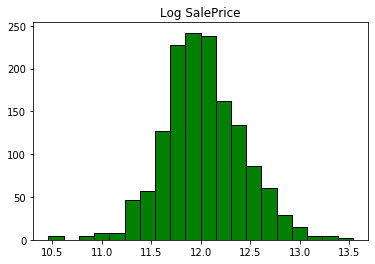

In [1950]:
# target variable seems righ skewd meaning presence of outliers
# hence we need to noramlize it in order to make it normally distributed
y = np.log1p(y)
plt.title('Log SalePrice')
plt.hist(y, color = "green", bins = 20, ec = "black")
plt.show()


In [1951]:
# transform the target variable
# house_df['SalePrice'] = np.log1p(house_df['SalePrice'])
target = np.log1p(house_df['SalePrice'])

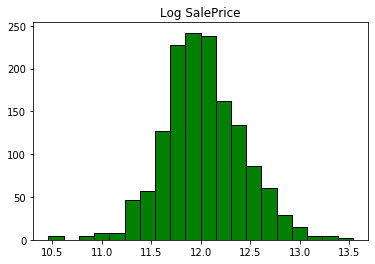

In [1952]:
plt.title('Log SalePrice')
plt.hist(target, color = "green", bins = 20, ec = "black")
plt.show()

In [1953]:
#good

In [1954]:
house_df.isnull().all(axis=0).sum()

0

In [1955]:
house_df.isnull().all(axis=1).sum()

0

In [1956]:
house_df['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

In [1958]:
import calendar

house_df['MonthSold'] = house_df['MoSold'].apply(lambda x: calendar.month_name[x])

house_df.drop("MoSold", axis = 1, inplace = True)

In [1959]:
# # house age
house_df['Age'] = house_df['YrSold'] - house_df['YearBuilt']
house_df['ReModelAge'] = house_df['YrSold'] - house_df['YearRemodAdd']
house_df['Garage_Age'] = house_df['YrSold'] - house_df['GarageYrBlt']


In [1960]:
house_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis = 1, inplace = True)

## EDA

In [1961]:
house_numeric = house_df.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,ReModelAge,Garage_Age
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,5,5,5.0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,31,31,31.0
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,7,6,7.0
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,91,36,8.0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,8,8,8.0


In [1962]:
house_numeric.shape

(1460, 35)

In [1963]:
for col in house_numeric.columns:
    if len(house_df[col].value_counts()) <= 1:
        house_df.drop(col, axis = 1, inplace = True)
        
        
house_numeric.shape

(1460, 35)

In [1964]:
# paiwise scatter plot

# taking toooooo much time

# plt.figure(figsize=(30, 20))
# sns.pairplot(house_numeric)
# plt.show()

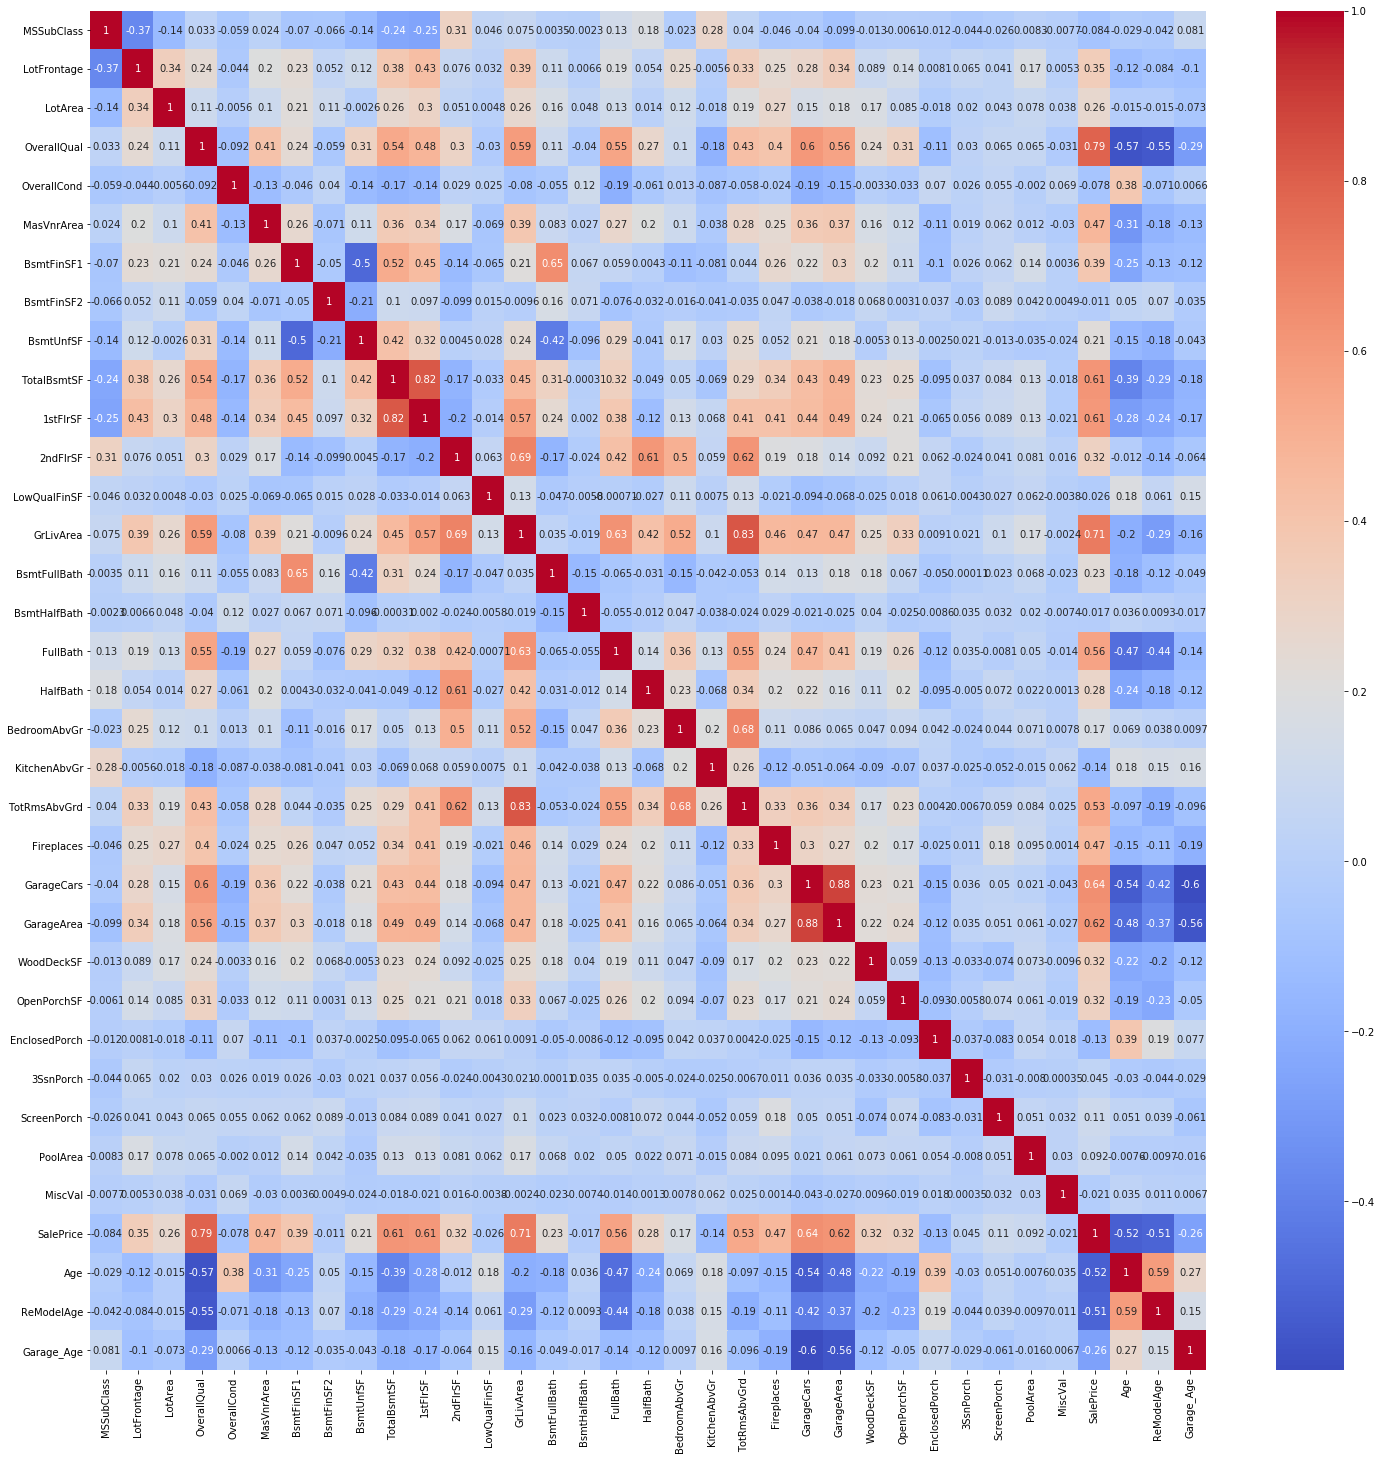

In [1965]:
cor = house_numeric.corr()
cor

# plotting correlations on a heatmap

# figure size
# plt.figure(figsize=(40,30))

# heatmap
# sns.heatmap(cor, cmap="coolwarm", annot=True)



plt.subplots(figsize=(25,25))
sns.heatmap(cor, cmap="coolwarm", annot=True, fmt='.2g')


plt.show()

In [1966]:
house_df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [1967]:
house_df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

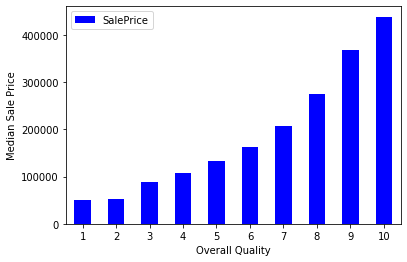

In [1968]:
# lets see how overall quality affects house price

quality_pivot = house_df.pivot_table(index= 'OverallQual', values= 'SalePrice')

# plotting the pivot table
quality_pivot.plot(kind = 'bar', color = 'blue')

plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

Observations: 
- Quality affects house prices
- High quality has high sale price of the house
- Low quality has high sale price of the house

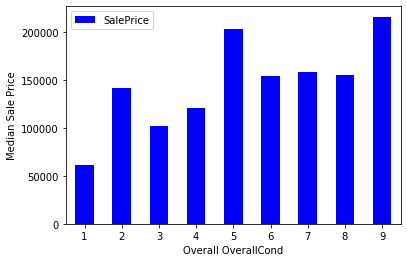

In [1969]:
# OverallCond


quality_pivot = house_df.pivot_table(index= 'OverallCond', values= 'SalePrice')

# plotting the pivot table
quality_pivot.plot(kind = 'bar', color = 'blue')

plt.xlabel('Overall OverallCond')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

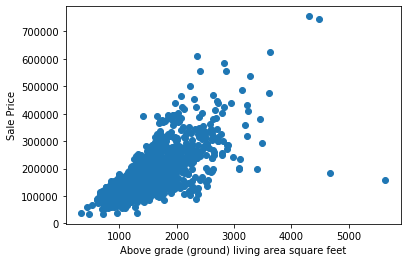

In [1970]:
# ground living area realtion with house price

plt.scatter(x = house_df['GrLivArea'], y = house_df["SalePrice"])

plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Sale Price')
plt.show()

Observations: 
-   More living area more house sale price

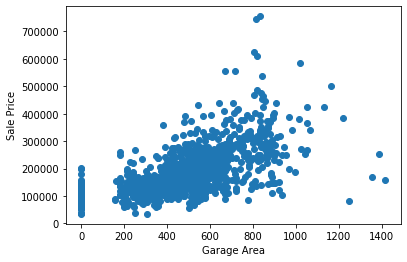

In [1971]:
# garage area realtion with house price
plt.scatter(x = house_df['GarageArea'], y = house_df["SalePrice"])

plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

Observations: 
-   More Garage Area more house sale price

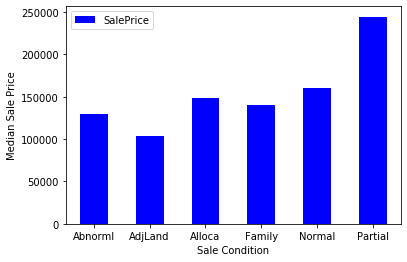

In [1972]:
# feature - Sale Condition
sale_condition_pivot = house_df.pivot_table(index= 'SaleCondition', values= 'SalePrice', aggfunc= np.median)

sale_condition_pivot.plot(kind= 'bar', color = 'blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

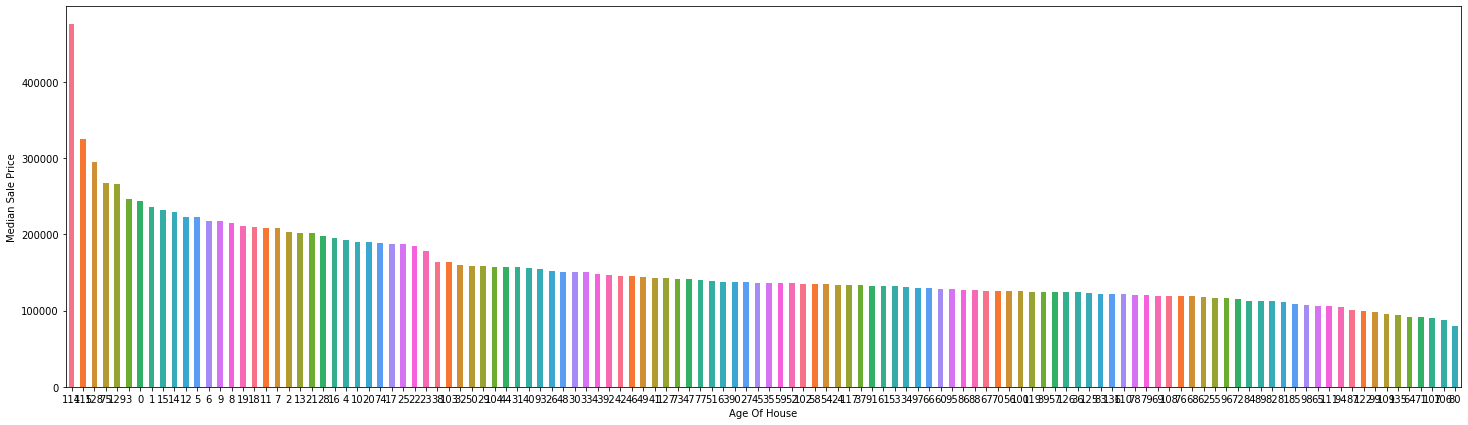

In [1973]:
# feature - age of house

plt.figure(figsize=(25,7))
house_df.groupby("Age").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Age Of House')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

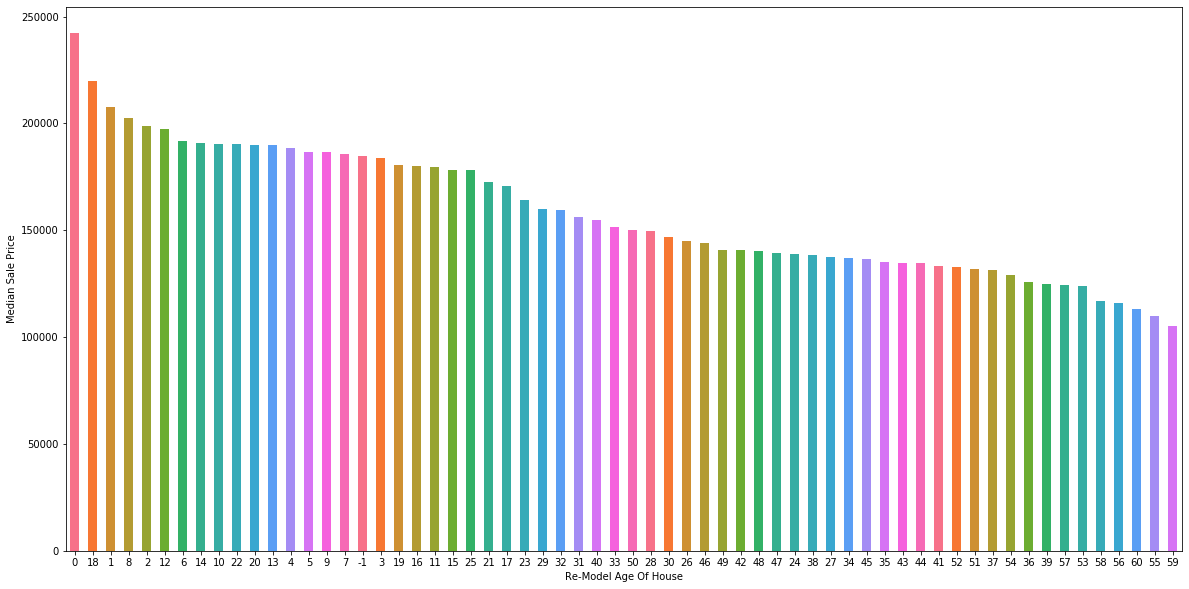

In [1974]:
# ReModelAge
plt.figure(figsize=(20,10))
house_df.groupby("ReModelAge").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Re-Model Age Of House')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

Observations:
- if house is old and has remodeled this clearly increase the hosue price

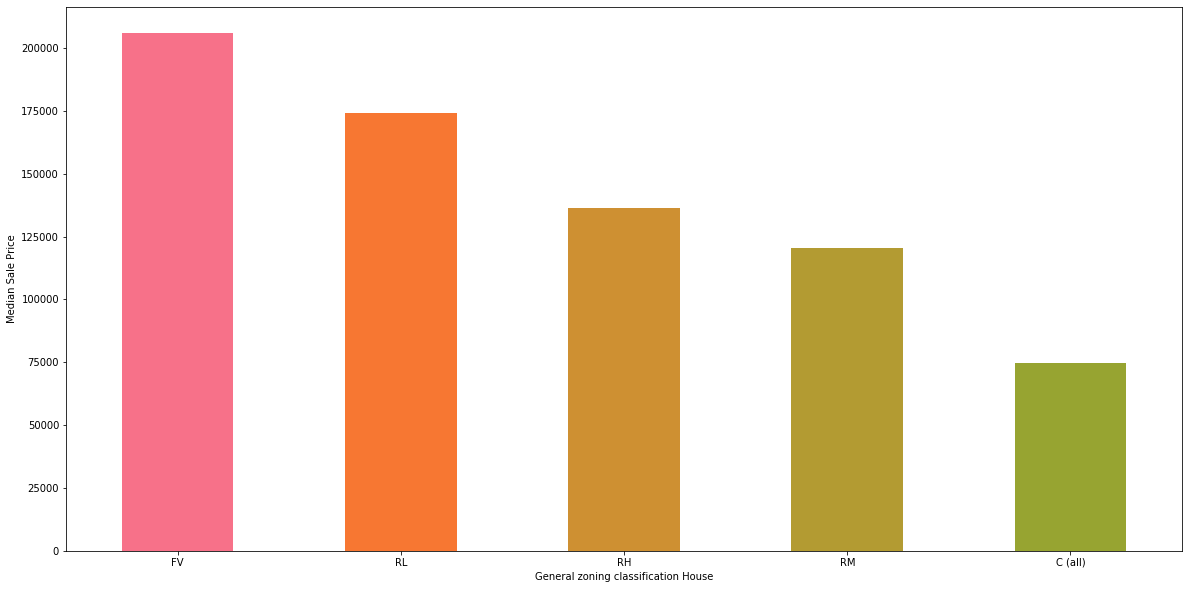

In [1975]:
# feature - MSZoning

plt.figure(figsize=(20,10))
house_df.groupby("MSZoning").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('General zoning classification House')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

Observations:
-  Floating Village Residential, Residential Low Density attracts high house prices
-  In contrast Agriculture,	Commercial area houses has low prices

In [1976]:
house_df.LotFrontage.unique()  

array([ 65. ,  80. ,  68. ,  60. ,  84. ,  85. ,  75. ,  51. ,  50. ,
        70. ,  71. ,  91. ,  73. ,  72. ,  66. , 101. ,  57. ,  44. ,
       110. ,  98. ,  47. , 108. , 112. ,  74. , 115. ,  66.5,  61. ,
        48. ,  33. ,  52. , 100. ,  24. ,  89. ,  63. ,  76. ,  81. ,
        95. ,  69. ,  21. ,  32. ,  78. , 121. , 122. ,  40. , 105. ,
        77. ,  64. ,  94. ,  34. ,  90. ,  55. ,  88. ,  82. , 120. ,
       107. ,  92. , 134. ,  62. ,  86. , 141. ,  97. ,  73.5,  54. ,
        41. ,  79. , 174. ,  99. ,  67. ,  83. ,  43. , 103. ,  93. ,
        30. ,  65.5, 129. , 140. ,  35. ,  37. , 118. ,  87. , 116. ,
       150. , 111. ,  49. ,  96. ,  59. ,  36. ,  56. , 102. ,  58. ,
        38. , 109. , 130. ,  53. , 137. ,  61.5,  45. , 106. , 104. ,
        42. ,  39. , 144. , 114. , 128. , 149. , 313. , 168. , 182. ,
       138. , 160. , 152. ,  88.5, 124. , 153. ,  46. ])

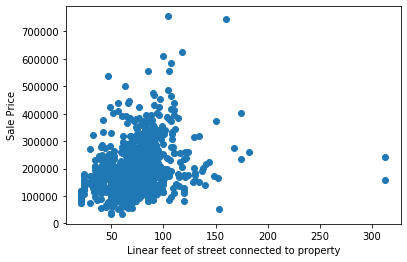

In [1977]:
# feature - LotFrontage

plt.scatter(x = house_df['LotFrontage'], y = house_df["SalePrice"])

plt.xlabel('Linear feet of street connected to property')
plt.ylabel('Sale Price')
plt.show()

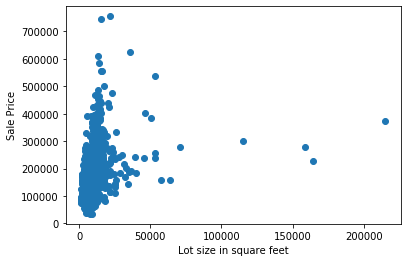

In [1978]:
# LotArea
plt.scatter(x = house_df['LotArea'], y = house_df["SalePrice"])

plt.xlabel('Lot size in square feet')
plt.ylabel('Sale Price')
plt.show()

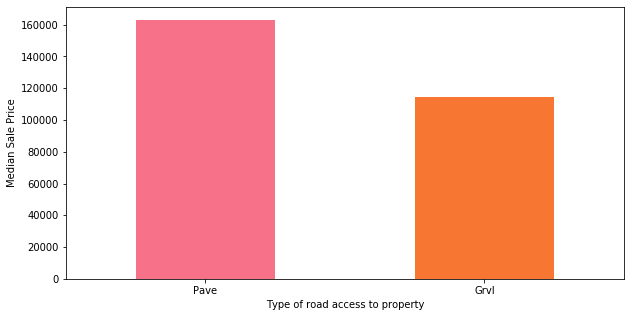

In [1979]:
# feature - Street

plt.figure(figsize=(10,5))
house_df.groupby("Street").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Type of road access to property')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

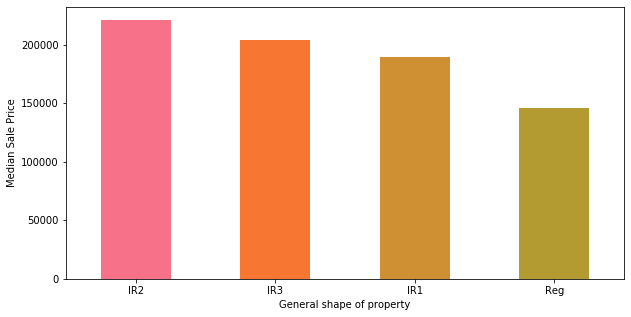

In [1980]:
# feature - LotShape

plt.figure(figsize=(10,5))
house_df.groupby("LotShape").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('General shape of property')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

Observations: 
- Does not affect that much in price of the hosue, as we can see Irregular lot shape also attracts good house price

In [1981]:
# RoofMatl
house_df.RoofMatl.unique()  

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

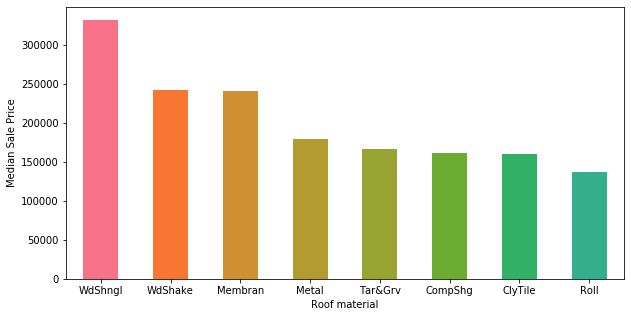

In [1982]:
# feature - RoofMatl

plt.figure(figsize=(10,5))
house_df.groupby("RoofMatl").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Roof material')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

Observations:
-   houses with Roof material type Wood Shingles, Wood Shakes, Membrane has high prices
-   and houses with roof material Roll, Clay or Tile has low prices

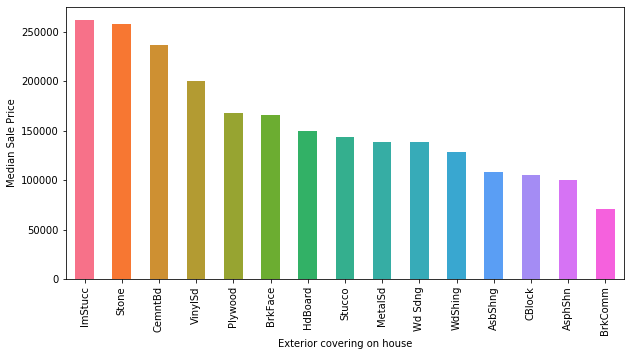

In [1983]:
# Exterior1st - Exterior covering on house

plt.figure(figsize=(10,5))
house_df.groupby("Exterior1st").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Exterior covering on house')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 90)
plt.show()

Observations: 
-  If coverring is of Imitation Stucco, stone, Cement Board house has high price
-  If coverring is of Brick Common, Asphalt Shingles, Cinder Block etc house has very low prices
-  Plywood, Brick Face has some moderate prices

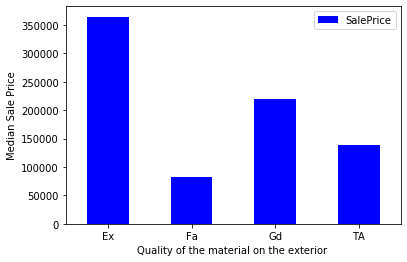

In [1984]:
# ExterQual
ext_qual_pivot = house_df.pivot_table(index= 'ExterQual', values= 'SalePrice', aggfunc= np.median)

ext_qual_pivot.plot(kind= 'bar', color = 'blue')
plt.xlabel('Quality of the material on the exterior ')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

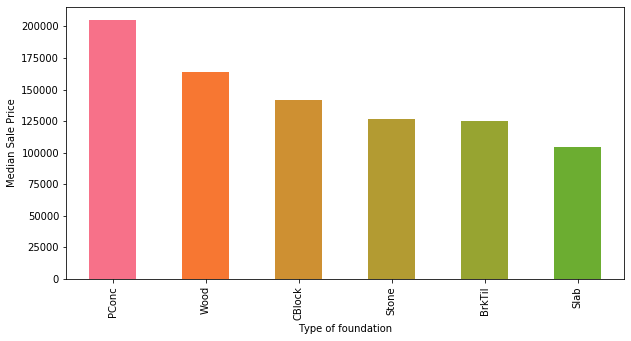

In [1985]:
# Foundation: Type of foundation
plt.figure(figsize=(10,5))
house_df.groupby("Foundation").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Type of foundation')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 90)
plt.show()

Observations:
-  Foundations like Poured Contrete	 make house prices high
-  Houses with foundation like Brick & Tile, or Slab has low prices


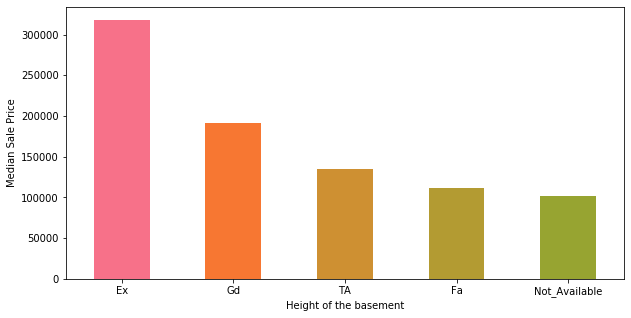

In [1986]:
# BsmtQual: Evaluates the height of the basement
plt.figure(figsize=(10,5))
house_df.groupby("BsmtQual").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Height of the basement')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

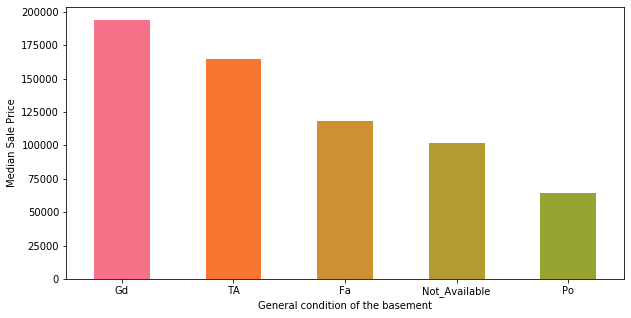

In [1987]:
# BsmtCond: Evaluates the general condition of the basement
plt.figure(figsize=(10,5))
house_df.groupby("BsmtCond").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('General condition of the basement')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

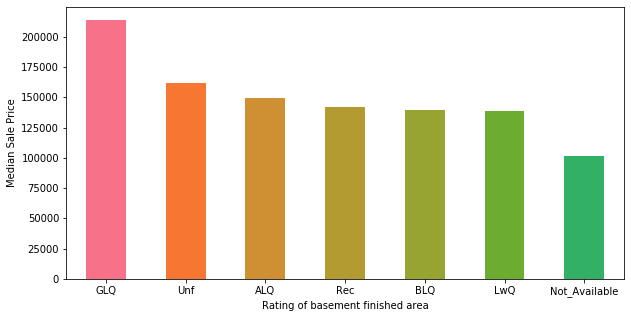

In [1988]:
# BsmtFinType1: Rating of basement finished area
plt.figure(figsize=(10,5))
house_df.groupby("BsmtFinType1").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Rating of basement finished area')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

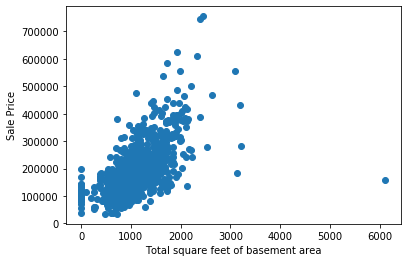

In [1989]:
# TotalBsmtSF

# LotArea
plt.scatter(x = house_df['TotalBsmtSF'], y = house_df["SalePrice"])

plt.xlabel('Total square feet of basement area')
plt.ylabel('Sale Price')
plt.show()

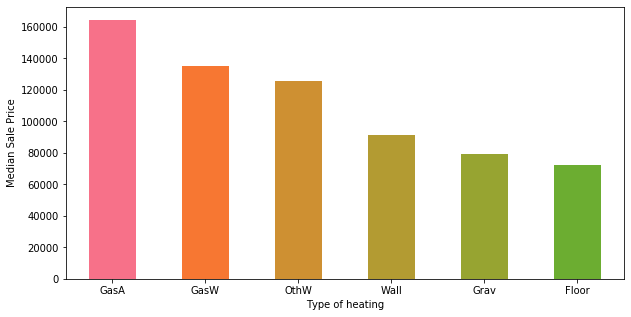

In [1990]:
# Heating: Type of heating

plt.figure(figsize=(10,5))
house_df.groupby("Heating").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Type of heating')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

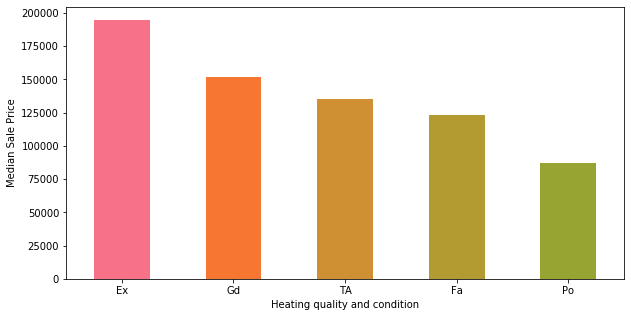

In [1991]:
# HeatingQC: Heating quality and condition

plt.figure(figsize=(10,5))
house_df.groupby("HeatingQC").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Heating quality and condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

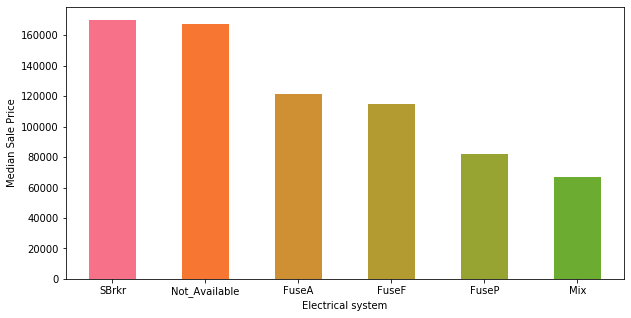

In [1992]:
# Electrical: Electrical system

plt.figure(figsize=(10,5))
house_df.groupby("Electrical").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Electrical system')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

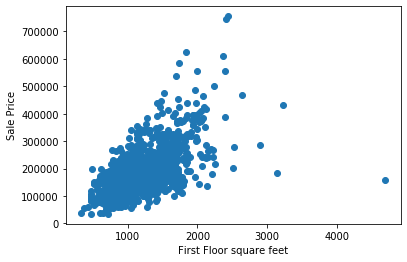

In [1993]:
# house_df["1stFlrSF"].value_counts()
# house_df["1stFlrSF"].nunique()

# 1stFlrSF

plt.scatter(x = house_df['1stFlrSF'], y = house_df["SalePrice"])

plt.xlabel('First Floor square feet')
plt.ylabel('Sale Price')
plt.show()

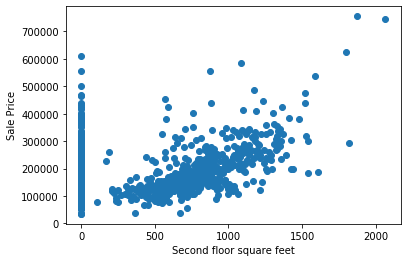

In [1994]:
# 2ndFlrSF: Second floor square feet

plt.scatter(x = house_df['2ndFlrSF'], y = house_df["SalePrice"])

plt.xlabel('Second floor square feet')
plt.ylabel('Sale Price')
plt.show()

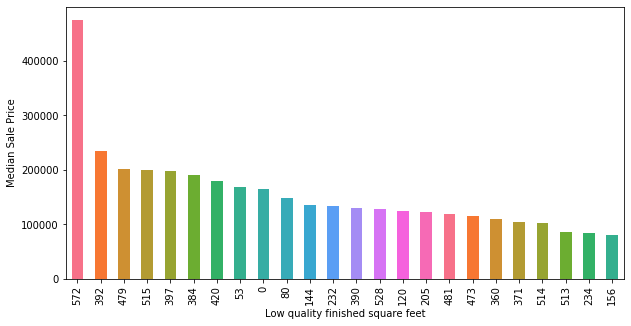

In [1995]:
# LowQualFinSF
# house_df["LowQualFinSF"].nunique()
# house_df["LowQualFinSF"].value_counts()


plt.figure(figsize=(10,5))
house_df.groupby("LowQualFinSF").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Low quality finished square feet')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 90)
plt.show()

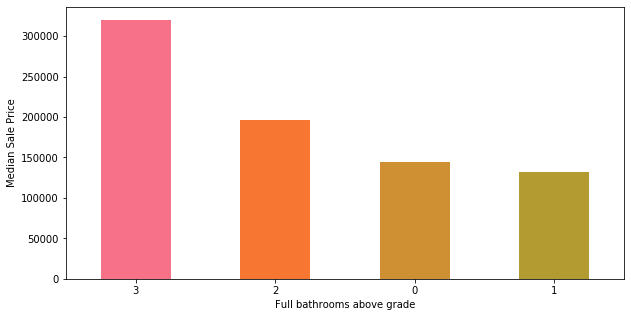

In [1996]:
# FullBath
# house_df["FullBath"].value_counts()

plt.figure(figsize=(10,5))
house_df.groupby("FullBath").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Full bathrooms above grade')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

In [1997]:
# # Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

# plt.figure(figsize=(10,5))
# house_df.groupby("Bedroom").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
# plt.xlabel('Bedrooms above grade')
# plt.ylabel('Median Sale Price')
# plt.xticks(rotation = 0)
# plt.show()

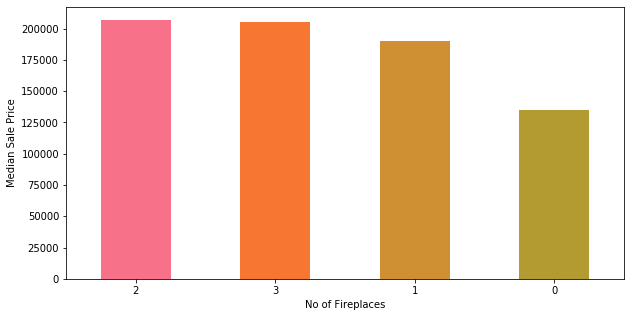

In [1998]:
# Fireplaces

plt.figure(figsize=(10,5))
house_df.groupby("Fireplaces").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('No of Fireplaces')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

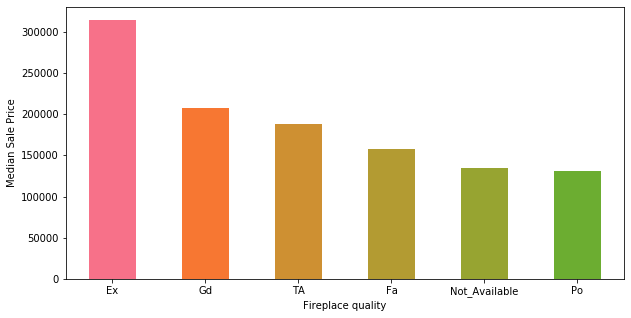

In [1999]:
# FireplaceQu: Fireplace quality

plt.figure(figsize=(10,5))
house_df.groupby("FireplaceQu").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Fireplace quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

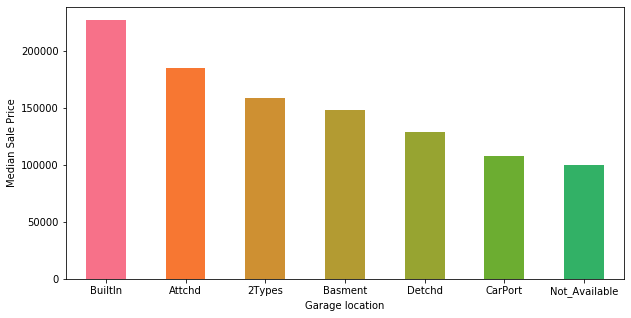

In [2000]:
# GarageType: Garage location

plt.figure(figsize=(10,5))
house_df.groupby("GarageType").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Garage location')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

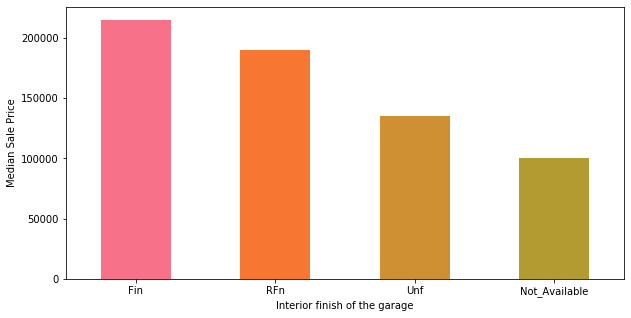

In [2001]:
# GarageFinish: Interior finish of the garage

plt.figure(figsize=(10,5))
house_df.groupby("GarageFinish").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Interior finish of the garage')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

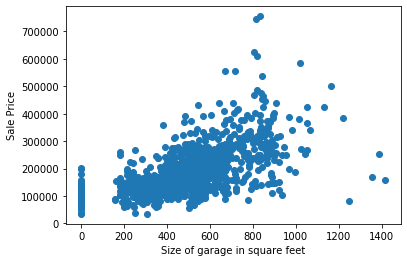

In [2002]:
# GarageArea: Size of garage in square feet

plt.scatter(x = house_df['GarageArea'], y = house_df["SalePrice"])

plt.xlabel('Size of garage in square feet')
plt.ylabel('Sale Price')
plt.show()

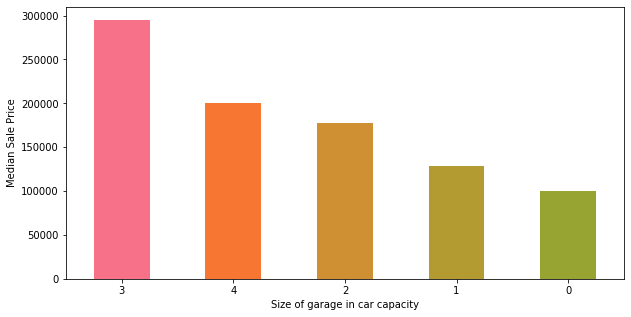

In [2003]:
# GarageCars: Size of garage in car capacity

plt.figure(figsize=(10,5))
house_df.groupby("GarageCars").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Size of garage in car capacity')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

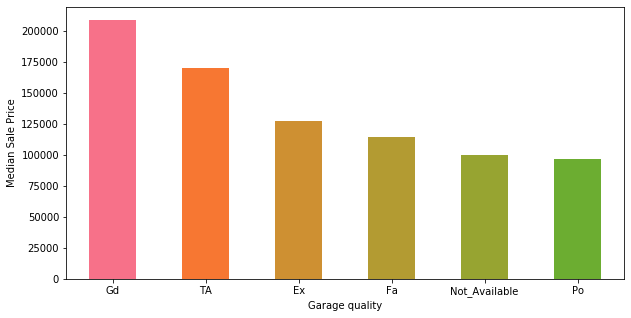

In [2004]:
# GarageQual: Garage quality

plt.figure(figsize=(10,5))
house_df.groupby("GarageQual").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Garage quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

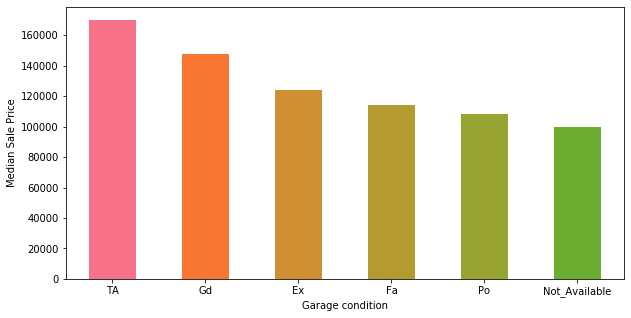

In [2005]:
# GarageCond: Garage condition

plt.figure(figsize=(10,5))
house_df.groupby("GarageCond").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Garage condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

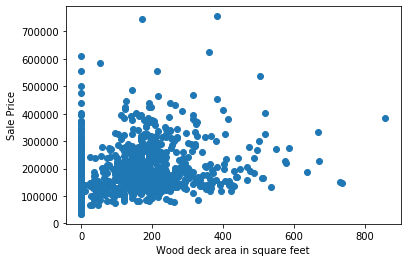

In [2006]:
# WoodDeckSF: Wood deck area in square feet

plt.scatter(x = house_df['WoodDeckSF'], y = house_df["SalePrice"])

plt.xlabel('Wood deck area in square feet')
plt.ylabel('Sale Price')
plt.show()

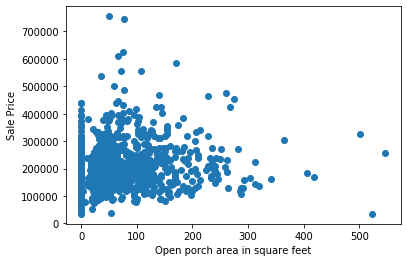

In [2007]:
# OpenPorchSF: Open porch area in square feet

plt.scatter(x = house_df['OpenPorchSF'], y = house_df["SalePrice"])

plt.xlabel('Open porch area in square feet')
plt.ylabel('Sale Price')
plt.show()

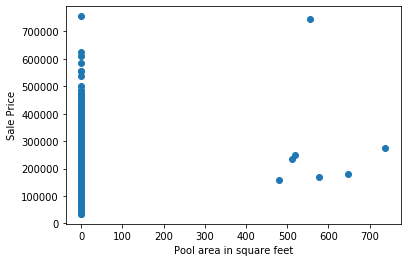

In [2008]:
# PoolArea: Pool area in square feet

plt.scatter(x = house_df['PoolArea'], y = house_df["SalePrice"])

plt.xlabel('Pool area in square feet')
plt.ylabel('Sale Price')
plt.show()

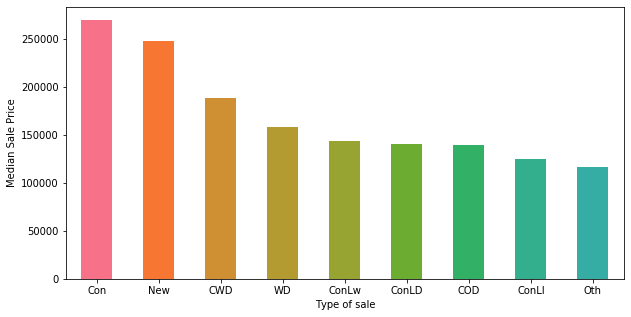

In [2009]:
# SaleType: Type of sale

plt.figure(figsize=(10,5))
house_df.groupby("SaleType").SalePrice.median().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
plt.xlabel('Type of sale')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

In [2010]:
# encoding
house_df = house_df.replace({"Alley": {"Not_Available" : 0, "Grvl" : 1, "Pave" : 2}})
house_df = house_df.replace({"BsmtCond":     {"Not_Available" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
house_df = house_df.replace({"BsmtExposure": {"Not_Available" : 0, "No" : 2, "Mn" : 2, "Av": 3, "Gd" : 4}})
house_df = house_df.replace({"BsmtFinType1": {"Not_Available" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}})
house_df = house_df.replace({"BsmtFinType2": {"Not_Available" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}})
house_df = house_df.replace({"BsmtQual":     {"Not_Available" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})
house_df = house_df.replace({"CentralAir":   {"Not_Available" : 0, "N" : 1, "Y" : 2}})
house_df = house_df.replace({"ExterCond":    {"Not_Available" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5}})
house_df = house_df.replace({"ExterQual":    {"Not_Available" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5}})
house_df = house_df.replace({"Fence":        {"Not_Available" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, "GdPrv" : 4}})
house_df = house_df.replace({"FireplaceQu":  {"Not_Available" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
house_df = house_df.replace({"Functional":   {"Not_Available" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8}})
house_df = house_df.replace({"GarageCond":   {"Not_Available" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
house_df = house_df.replace({"GarageQual":   {"Not_Available" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
house_df = house_df.replace({"GarageFinish": {"Not_Available" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3}})
house_df = house_df.replace({"HeatingQC":    {"Not_Available" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
house_df = house_df.replace({"KitchenQual":  {"Not_Available" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
house_df = house_df.replace({"LandContour":  {"Not_Available" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, "Lvl" : 4}})
house_df = house_df.replace({"LandSlope":    {"Not_Available" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3}})
house_df = house_df.replace({"LotShape":     {"Not_Available" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4}})
house_df = house_df.replace({"PavedDrive":   {"Not_Available" : 0, "N" : 0, "P" : 1, "Y" : 2}})
house_df = house_df.replace({"PoolQC":       {"Not_Available" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}})
house_df = house_df.replace({"Street":       {"Not_Available" : 0, "Grvl" : 1, "Pave" : 2}})
house_df = house_df.replace({"Utilities":    {"Not_Available" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})



In [2011]:
house_df['Street'] = house_df['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
house_df['CentralAir'] = house_df['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
house_df['PavedDrive'] = house_df['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [2012]:
# "MSSubClass" should be categorical as per the data dictionary, but its numeric, so lets convert that to categorical.

house_df = house_df.replace({'MSSubClass' : { 
    20 : '1-STORY 1946 & NEWER ALL STYLES', 
    30:'1-STORY 1945 & OLDER',
    40:'1-STORY W/FINISHED ATTIC ALL AGES',
    45:'1-1/2 STORY - UNFINISHED ALL AGES',
    50:'1-1/2 STORY FINISHED ALL AGES',
    60:'2-STORY 1946 & NEWER',
    70:'2-STORY 1945 & OLDER',
    75:'2-1/2 STORY ALL AGES',
    80:'SPLIT OR MULTI-LEVEL',
    85:'SPLIT FOYER',
    90:'DUPLEX - ALL STYLES AND AGES',
    120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150:'1-1/2 STORY PUD - ALL AGES',
    160:'2-STORY PUD - 1946 & NEWER',
    180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}
})

In [2013]:
def remove_outliers(dtf, numl_list):
    for j in numl_list:
        Q1 = dtf[j].quantile(0.05)
        Q3 = dtf[j].quantile(0.95)
        IQR = Q3 - Q1       
        dtf = dtf[(dtf[j] >= Q1-2.5*IQR) & (dtf[j] <= Q3+2.5*IQR)]
    return dtf

In [2014]:
num_var = house_df.select_dtypes(include = ['float64','int64'])
len(num_var.columns)

58

In [2015]:
house_df.shape

(1460, 79)

In [2016]:
house_df = remove_outliers(house_df, list(num_var.columns))
house_df.shape

(1158, 79)

### Model building

In [2017]:
# house_df["SalePrice"] = np.log1p(house_df['SalePrice'])
house_df["SalePrice"] = np.log(house_df['SalePrice'])

In [2018]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = house_df.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,MonthSold
0,2-STORY 1946 & NEWER,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Not_Available,WD,Normal,February
1,1-STORY 1946 & NEWER ALL STYLES,RL,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,Not_Available,WD,Normal,May
2,2-STORY 1946 & NEWER,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Not_Available,WD,Normal,September
3,2-STORY 1945 & OLDER,RL,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,Not_Available,WD,Abnorml,February
4,2-STORY 1946 & NEWER,RL,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Not_Available,WD,Normal,December


In [2019]:
house_categorical.columns

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition',
       'MonthSold'],
      dtype='object')

In [2020]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Not_Available,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Not_Available,Electrical_SBrkr,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MonthSold_August,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [2021]:
# drop categorical variables 
house_df.drop(list(house_categorical.columns), axis=1, inplace=True)

In [2022]:
house_df.shape

(1158, 58)

In [2023]:
# concat dummy variables with X
house_df = pd.concat([house_df, house_dummies], axis=1)

In [2024]:
house_df.shape

(1158, 209)

In [2025]:
target = house_df["SalePrice"]
house_df.drop("SalePrice", axis=1, inplace=True)

In [2026]:
target.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [2027]:
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2028]:
# scaler = StandardScaler()
# scaler.fit(house_df)


In [2029]:
# We will divide the data into 70/30 % to train and test data respectively.
house_df_train, house_df_test, y_train, y_test = train_test_split(house_df, target, train_size = 0.7, test_size = 0.3, random_state = 100)

In [2030]:
num_vars = house_df_train.select_dtypes(include=['int64','float64']).columns
num_vars

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'Age',
       'ReModelAge', 'Garage_Age'],
      dtype='object')

In [2031]:
scaler = StandardScaler()
house_df_train[num_vars] = scaler.fit_transform(house_df_train[num_vars])
house_df_test[num_vars] = scaler.transform(house_df_test[num_vars])

/home/niranjan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/niranjan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/niranjan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [2032]:
house_df_train.shape

(810, 208)

## Ridge Regression

In [2157]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


In [2094]:
# list of alphas to tune
params = {'alpha': [ 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100
                   ]}

ridge = Ridge()

# cross validation
folds = 5

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)       

model_cv.fit(house_df_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [2158]:
model_cv.best_params_

{'alpha': 9.0}

In [2159]:
model_cv.best_score_

-0.07830957755342934

In [2160]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009771,0.002932,0.002198,0.000341,0.0001,{'alpha': 0.0001},-0.083003,-0.084797,-0.082852,-0.086976,-0.078392,-0.083204,0.002831,26,-0.056315,-0.053234,-0.050610,-0.054923,-0.052174,-0.053451,0.002006
1,0.007033,0.000227,0.001764,0.000043,0.001,{'alpha': 0.001},-0.082854,-0.084696,-0.082790,-0.086986,-0.078404,-0.083146,0.002823,25,-0.056328,-0.053251,-0.050618,-0.054927,-0.052207,-0.053466,0.002003
2,0.008528,0.003292,0.001831,0.000286,0.01,{'alpha': 0.01},-0.081713,-0.083921,-0.082316,-0.087089,-0.078538,-0.082715,0.002800,24,-0.056441,-0.053406,-0.050710,-0.054976,-0.052436,-0.053594,0.001985
3,0.017724,0.005997,0.002174,0.000877,0.05,{'alpha': 0.05},-0.079747,-0.082276,-0.081270,-0.087513,-0.078789,-0.081919,0.003045,23,-0.056777,-0.053966,-0.051059,-0.055207,-0.053015,-0.054005,0.001938
4,0.007005,0.002243,0.001536,0.000081,0.1,{'alpha': 0.1},-0.078980,-0.081182,-0.080712,-0.087862,-0.078959,-0.081539,0.003286,21,-0.057085,-0.054581,-0.051444,-0.055455,-0.053599,-0.054433,0.001883
5,0.005786,0.000114,0.001678,0.000503,0.2,{'alpha': 0.2},-0.078594,-0.079897,-0.080086,-0.088334,-0.079218,-0.081226,0.003593,20,-0.057570,-0.055491,-0.052024,-0.055899,-0.054517,-0.055100,0.001827
6,0.006096,0.000631,0.005706,0.008530,0.3,{'alpha': 0.3},-0.078412,-0.079125,-0.079699,-0.088652,-0.079134,-0.081004,0.003846,19,-0.058011,-0.056156,-0.052546,-0.056288,-0.055282,-0.055656,0.001789
7,0.005716,0.000046,0.001419,0.000020,0.4,{'alpha': 0.4},-0.078228,-0.079064,-0.079459,-0.088850,-0.078903,-0.080901,0.003994,18,-0.058483,-0.056672,-0.053013,-0.056599,-0.056053,-0.056164,0.001775
8,0.005803,0.000079,0.001415,0.000022,0.5,{'alpha': 0.5},-0.078100,-0.078995,-0.079329,-0.088971,-0.078569,-0.080793,0.004110,17,-0.058901,-0.057100,-0.053405,-0.056849,-0.056713,-0.056593,0.001779
9,0.010180,0.004925,0.001762,0.000307,0.6,{'alpha': 0.6},-0.078052,-0.078929,-0.079248,-0.089040,-0.078224,-0.080699,0.004194,16,-0.059258,-0.057463,-0.053742,-0.057083,-0.057290,-0.056967,0.001789


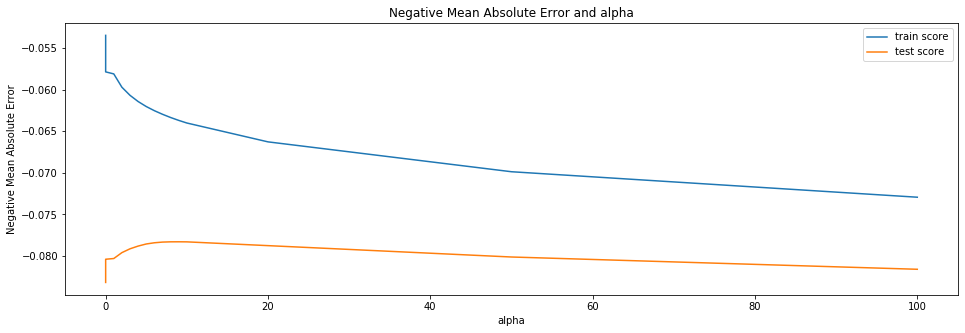

In [2161]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### final ridge model (alpha = 10)

In [2162]:
# final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(house_df_train, y_train)
ridge.coef_

array([ 0.01064643,  0.00992699,  0.        ,  0.00794042, -0.00514464,
        0.00050812,  0.        ,  0.        ,  0.06569257,  0.04048566,
        0.00804559,  0.00124668, -0.01019432,  0.008416  , -0.00217041,
        0.00842087,  0.01248348,  0.02222061, -0.00033361,  0.00495502,
        0.00010578,  0.02562103,  0.01268871,  0.        ,  0.02924815,
        0.02134513,  0.        ,  0.04139784,  0.01161351,  0.00519142,
        0.01868608,  0.01570825,  0.00801663,  0.        ,  0.01208045,
        0.02347912,  0.01097904,  0.01610545,  0.00013684,  0.00536166,
        0.01564682,  0.02434122,  0.01558509, -0.00947286,  0.        ,
        0.01348347,  0.00841804,  0.0066698 ,  0.        ,  0.01477052,
        0.        ,  0.        , -0.00073251,  0.        , -0.05539192,
       -0.01099782,  0.00717285,  0.01951995, -0.0210724 ,  0.01183119,
        0.00019915,  0.00755075, -0.0062866 ,  0.00628618,  0.02487422,
        0.01128703, -0.04084119, -0.00971978, -0.01039087,  0.01

#### prediction on training data

In [2163]:
# lets predict the R-squared value on train data

from sklearn import metrics

y_train_pred = ridge.predict(house_df_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.928360391883025


#### prediction on test data

In [2164]:
y_test_pred = ridge.predict(house_df_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9143750891876959


#### RMSE

In [2165]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: ', mean_squared_error(y_test, y_test_pred))

RMSE is:  0.014404797528572854


In [2166]:
# Ridge model parameters
model_parameters_1 = list(ridge.coef_)
model_parameters_1.insert(0, ridge.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = house_df_train.columns
cols = cols.insert(0, "constant")
ridge_imp_params =  list(zip(cols, model_parameters_1))
ridge_imp_params

[('constant', 11.887),
 ('LotFrontage', 0.011),
 ('LotArea', 0.01),
 ('Street', 0.0),
 ('Alley', 0.008),
 ('LotShape', -0.005),
 ('LandContour', 0.001),
 ('Utilities', 0.0),
 ('LandSlope', 0.0),
 ('OverallQual', 0.066),
 ('OverallCond', 0.04),
 ('MasVnrArea', 0.008),
 ('ExterQual', 0.001),
 ('ExterCond', -0.01),
 ('BsmtQual', 0.008),
 ('BsmtCond', -0.002),
 ('BsmtExposure', 0.008),
 ('BsmtFinType1', 0.012),
 ('BsmtFinSF1', 0.022),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 0.005),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.026),
 ('HeatingQC', 0.013),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.029),
 ('2ndFlrSF', 0.021),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.041),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', 0.005),
 ('FullBath', 0.019),
 ('HalfBath', 0.016),
 ('BedroomAbvGr', 0.008),
 ('KitchenAbvGr', 0.0),
 ('KitchenQual', 0.012),
 ('TotRmsAbvGrd', 0.023),
 ('Functional', 0.011),
 ('Fireplaces', 0.016),
 ('FireplaceQu', 0.0),
 ('GarageFinish', 0.005),
 ('GarageCars', 0.016),
 ('GarageArea', 

In [2167]:
print(len(ridge_imp_params))

209


In [2168]:
count = 0
for param in ridge_imp_params:

    if param[1] > 0.05:
        print(param)
        count = count + 1
        
        
count

('constant', 11.887)
('OverallQual', 0.066)
('Neighborhood_Crawfor', 0.073)
('Neighborhood_NridgHt', 0.057)
('Neighborhood_StoneBr', 0.097)
('Condition2_Norm', 0.065)
('Exterior1st_BrkFace', 0.06)
('SaleCondition_Normal', 0.052)


8

In [2169]:
ridge_imp_params = sorted(ridge_imp_params, key = lambda x: -x[1])
ridge_imp_params

[('constant', 11.887),
 ('Neighborhood_StoneBr', 0.097),
 ('Neighborhood_Crawfor', 0.073),
 ('OverallQual', 0.066),
 ('Condition2_Norm', 0.065),
 ('Exterior1st_BrkFace', 0.06),
 ('Neighborhood_NridgHt', 0.057),
 ('SaleCondition_Normal', 0.052),
 ('MSZoning_FV', 0.05),
 ('Condition1_Norm', 0.043),
 ('GrLivArea', 0.041),
 ('OverallCond', 0.04),
 ('Neighborhood_ClearCr', 0.036),
 ('SaleCondition_Partial', 0.036),
 ('Neighborhood_BrkSide', 0.034),
 ('Exterior2nd_Wd Sdng', 0.032),
 ('1stFlrSF', 0.029),
 ('MSZoning_RL', 0.029),
 ('Neighborhood_Veenker', 0.029),
 ('GarageType_Basment', 0.029),
 ('Exterior1st_MetalSd', 0.028),
 ('TotalBsmtSF', 0.026),
 ('MSSubClass_2-STORY 1945 & OLDER', 0.025),
 ('LotConfig_CulDSac', 0.025),
 ('GarageArea', 0.024),
 ('Neighborhood_NoRidge', 0.024),
 ('TotRmsAbvGrd', 0.023),
 ('BsmtFinSF1', 0.022),
 ('Neighborhood_Somerst', 0.022),
 ('MonthSold_September', 0.022),
 ('2ndFlrSF', 0.021),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', 0.02),
 ('Exterior1st_VinylSd

#### Top 5 predictors according to Ridge model built

In [2170]:
count = 0
for i in range(6):
    print(ridge_imp_params[i])
    

('constant', 11.887)
('Neighborhood_StoneBr', 0.097)
('Neighborhood_Crawfor', 0.073)
('OverallQual', 0.066)
('Condition2_Norm', 0.065)
('Exterior1st_BrkFace', 0.06)


In [2107]:
final_predictions = np.exp(y_test_pred)
final_predictions



array([147641.14440278, 160421.02063849, 240266.98071928, 108666.6524258 ,
       445051.99580219,  99567.60763407, 120974.78334993, 231649.77692216,
       184893.05268155, 105092.19579762, 126942.06579402, 289313.484241  ,
       231390.97412423, 161811.19410188, 157234.42964294, 279478.28418844,
       317480.14353872, 156338.77116355, 165905.63188078,  98940.02128427,
       207166.64459617, 152737.52201002, 232303.71467779, 132302.86931365,
       370442.55457938, 648041.86377721, 170820.71341351, 337509.37941763,
       329550.42320629, 151657.12689591, 306252.05160495, 199623.88780508,
       128532.25226836, 127429.26142596, 261921.73699717, 104301.29726679,
       124079.71794061, 125028.12484906, 304720.78800553, 171502.13564517,
       177374.26689131, 138275.37311729, 157250.19432004, 143283.20827043,
       113003.04264225, 238140.71686686, 112297.56661932, 170536.63395915,
       231618.81098097, 204354.95892762, 145072.36100606, 153866.54334759,
       161432.24840401, 1

In [2110]:
final_predictions.mean()

191463.26627856222

## LASSO Regression

In [2180]:
#lasso
params = {'alpha': [ 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100
                   ]}

lasso = Lasso()

# cross validation
folds = 5

model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(house_df_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [2183]:
# cv results
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.085927,0.044545,0.002065,0.000741,0.0001,{'alpha': 0.0001},-0.076473,-0.076356,-0.078966,-0.086464,-0.075453,-0.078742,0.004033,2,-0.058701,-0.056794,-0.053560,-0.057154,-0.055554,-0.056353,0.001720
1,0.012437,0.000768,0.001410,0.000033,0.001,{'alpha': 0.001},-0.080101,-0.072356,-0.082238,-0.084179,-0.072630,-0.078301,0.004915,1,-0.066927,-0.066588,-0.064426,-0.066046,-0.066412,-0.066080,0.000874
2,0.006147,0.000185,0.001400,0.000108,0.01,{'alpha': 0.01},-0.090475,-0.086896,-0.082464,-0.093425,-0.081183,-0.086889,0.004641,3,-0.081799,-0.084402,-0.078351,-0.082662,-0.083632,-0.082169,0.002102
3,0.005281,0.000247,0.001324,0.000007,0.05,{'alpha': 0.05},-0.118249,-0.117283,-0.098173,-0.112603,-0.110016,-0.111265,0.007208,4,-0.109206,-0.111682,-0.104209,-0.108772,-0.108417,-0.108457,0.002413
4,0.004899,0.000138,0.003341,0.003983,0.1,{'alpha': 0.1},-0.151207,-0.163064,-0.130575,-0.142026,-0.143289,-0.146032,0.010764,5,-0.145238,-0.146941,-0.140955,-0.143482,-0.144481,-0.144219,0.001986
5,0.009068,0.003585,0.001887,0.000343,0.2,{'alpha': 0.2},-0.229107,-0.244233,-0.199515,-0.204117,-0.221606,-0.219716,0.016397,6,-0.219110,-0.220444,-0.215457,-0.222041,-0.218060,-0.219023,0.002226
6,0.005858,0.001497,0.001817,0.000239,0.3,{'alpha': 0.3},-0.294681,-0.305380,-0.264146,-0.259134,-0.287759,-0.282220,0.017787,7,-0.280942,-0.278077,-0.279951,-0.287933,-0.282664,-0.281913,0.003356
7,0.005462,0.000395,0.002494,0.001515,0.4,{'alpha': 0.4},-0.294681,-0.305380,-0.271220,-0.260349,-0.287759,-0.283878,0.016174,8,-0.280942,-0.278077,-0.286742,-0.289355,-0.282664,-0.283556,0.004036
8,0.005923,0.000849,0.001779,0.000061,0.5,{'alpha': 0.5},-0.294681,-0.305380,-0.271220,-0.260349,-0.287759,-0.283878,0.016174,8,-0.280942,-0.278077,-0.286742,-0.289355,-0.282664,-0.283556,0.004036
9,0.004573,0.000264,0.001499,0.000093,0.6,{'alpha': 0.6},-0.294681,-0.305380,-0.271220,-0.260349,-0.287759,-0.283878,0.016174,8,-0.280942,-0.278077,-0.286742,-0.289355,-0.282664,-0.283556,0.004036


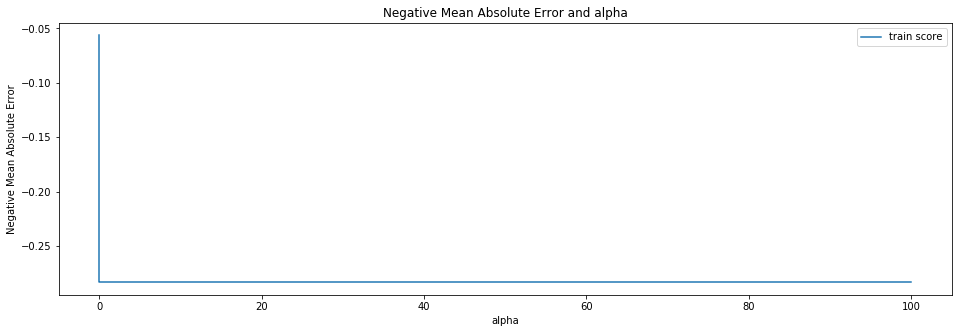

In [2186]:
# plotting mean test and train scoes with alpha 

cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
# plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score'], loc='upper right')
plt.show()

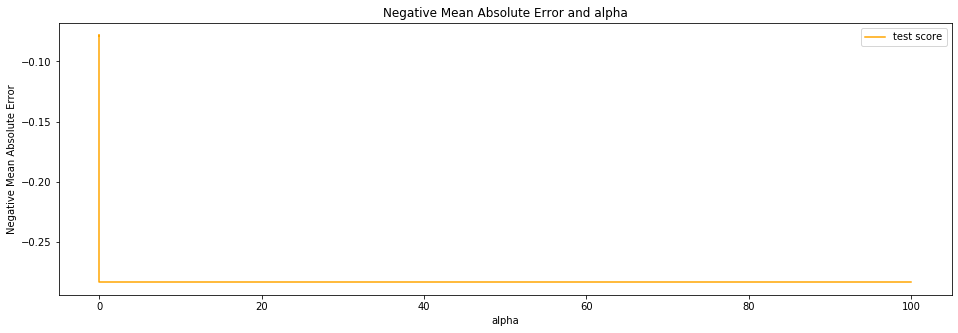

In [2189]:
# plotting mean test and train scoes with alpha 

cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'], color="orange")
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['test score'], loc='upper right')
plt.show()

In [2141]:
#checking the value of optimum number of parameters
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 0.001}
-0.07830077360949014


### Final lasso model  (alpha = 0.001)

In [2142]:
# final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(house_df_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Prediction on Training data

In [2143]:
# predict the R-squared value on train data
y_train_pred = lasso.predict(house_df_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9227862283964168


#### Prediction on Test data

In [2144]:
# predict the R-squared value on test data
y_test_pred = lasso.predict(house_df_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.919773024034843


#### RMSE

In [2145]:
# RMSE
print ('RMSE is: ', mean_squared_error(y_test, y_test_pred))

RMSE is:  0.013496695460986152


In [2146]:
# Lasso model parameters
model_parameters_lasso = list(lasso.coef_)
model_parameters_lasso.insert(0, lasso.intercept_)
model_parameters_lasso = [round(x, 3) for x in model_parameters_lasso]
cols = house_df_train.columns
cols = cols.insert(0, "constant")
lasso_imp_params = list(zip(cols, model_parameters_lasso))

#### Final Prediction result

In [2147]:
final_predictions = np.exp(y_test_pred)
final_predictions

array([146542.37237252, 162606.44644316, 222653.57430538, 114120.90296098,
       443691.07121526, 103475.96001977, 124133.00415411, 242601.00309186,
       186619.87421321, 102390.421098  , 123005.82950762, 285544.46879141,
       218042.66331883, 162171.50317654, 158979.0263451 , 275103.85775003,
       312776.0438841 , 160248.03796605, 161202.49414368,  97855.57999644,
       200270.38522031, 150977.26783041, 232116.37314603, 127411.22572452,
       363802.36329642, 668492.98566858, 177293.64956892, 329363.48981984,
       338630.61181694, 142032.91550435, 301840.53976055, 202375.02049438,
       126490.82995677, 126206.46351843, 255255.36651366, 103632.02068146,
       122742.4098    , 126901.45349177, 299144.94550577, 170725.93997942,
       172371.30415386, 136169.71494866, 151728.82993022, 139129.31516475,
       111953.42136058, 244097.28168048, 112133.4905162 , 165456.87597541,
       233164.38430954, 206696.8199619 , 144262.87504531, 152788.63517064,
       157101.24116063, 1

In [2148]:
final_predictions.mean()

191349.02221057416

In [2149]:
lasso_imp_params = sorted(lasso_imp_params, key = lambda x: -x[1])
lasso_imp_params

[('constant', 11.965),
 ('Neighborhood_StoneBr', 0.113),
 ('GrLivArea', 0.079),
 ('Neighborhood_Crawfor', 0.079),
 ('OverallQual', 0.074),
 ('Neighborhood_NridgHt', 0.056),
 ('Exterior1st_BrkFace', 0.056),
 ('SaleCondition_Partial', 0.055),
 ('MSZoning_FV', 0.053),
 ('SaleCondition_Normal', 0.046),
 ('OverallCond', 0.042),
 ('Condition1_Norm', 0.033),
 ('TotalBsmtSF', 0.029),
 ('Exterior1st_MetalSd', 0.028),
 ('MSZoning_RL', 0.027),
 ('BsmtFinSF1', 0.023),
 ('GarageArea', 0.022),
 ('Neighborhood_BrkSide', 0.021),
 ('TotRmsAbvGrd', 0.02),
 ('LotConfig_CulDSac', 0.017),
 ('Exterior1st_VinylSd', 0.017),
 ('Fireplaces', 0.016),
 ('HeatingQC', 0.015),
 ('ScreenPorch', 0.015),
 ('Neighborhood_Somerst', 0.015),
 ('Exterior2nd_Wd Sdng', 0.015),
 ('LotFrontage', 0.014),
 ('LotArea', 0.014),
 ('GarageCars', 0.014),
 ('BsmtFullBath', 0.013),
 ('KitchenQual', 0.012),
 ('FullBath', 0.011),
 ('WoodDeckSF', 0.011),
 ('1stFlrSF', 0.01),
 ('Functional', 0.01),
 ('GarageQual', 0.01),
 ('MonthSold_July',

#### Top 5 predictors according to lasso model built

In [2150]:
count = 0
for i in range(6):
    print(lasso_imp_params[i])
    

('constant', 11.965)
('Neighborhood_StoneBr', 0.113)
('GrLivArea', 0.079)
('Neighborhood_Crawfor', 0.079)
('OverallQual', 0.074)
('Neighborhood_NridgHt', 0.056)


In [2151]:
count = 0
for param in lasso_imp_params:

    if param[1] == 0:
        print(param)
        count = count + 1
        
        
count

('Street', 0.0)
('LandContour', -0.0)
('Utilities', 0.0)
('LandSlope', 0.0)
('BsmtCond', -0.0)
('BsmtFinType2', 0.0)
('BsmtUnfSF', -0.0)
('CentralAir', 0.0)
('2ndFlrSF', 0.0)
('LowQualFinSF', 0.0)
('KitchenAbvGr', 0.0)
('FireplaceQu', 0.0)
('PavedDrive', 0.0)
('3SsnPorch', 0.0)
('PoolArea', 0.0)
('PoolQC', 0.0)
('Fence', -0.0)
('MiscVal', 0.0)
('Garage_Age', 0.0)
('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 0.0)
('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', 0.0)
('MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES', -0.0)
('MSSubClass_2-1/2 STORY ALL AGES', -0.0)
('MSSubClass_2-STORY 1945 & OLDER', 0.0)
('MSSubClass_2-STORY 1946 & NEWER', -0.0)
('MSSubClass_DUPLEX - ALL STYLES AND AGES', -0.0)
('MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', -0.0)
('MSSubClass_SPLIT FOYER', 0.0)
('MSSubClass_SPLIT OR MULTI-LEVEL', -0.0)
('MSZoning_RH', 0.0)
('LotConfig_FR2', -0.0)
('LotConfig_FR3', -0.0)
('Neighborhood_Blueste', 0.0)
('Neighborhood_BrDale', -0.0)
('Ne

131



## QUESTION AND ANSWERS


### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

- What is the optimal value of alpha for ridge and lasso regression?

#### ANS:

The optimal value of alpha for

Ridge =  10

Lasso =  0.01


- What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

#### ANS:

lets try building the model that way

### Ridge

In [2152]:
# Ridge model after we double the optimal alpha value
alpha = 20
ridge2 = Ridge(alpha=alpha)

ridge2.fit(house_df_train, y_train)
ridge2.coef_


y_train_pred2 = ridge2.predict(house_df_train)
print("R2 of train", metrics.r2_score(y_true=y_train, y_pred=y_train_pred2))    # 0.928360391883025 when alpha=10


y_test_pred2 = ridge2.predict(house_df_test)
print("R2 of test", metrics.r2_score(y_true=y_test, y_pred=y_test_pred2))       # 0.928360391883025 when alpha=10

print ('RMSE is: ', mean_squared_error(y_test, y_test_pred2))                   # 0.014404797528572854 when alpha=10

model_parameters_2 = list(ridge2.coef_)
model_parameters_2.insert(0, ridge2.intercept_)
model_parameters_2 = [round(x, 3) for x in model_parameters_2]
cols = house_df_train.columns
cols = cols.insert(0, "constant")
ridge_imp_params2 =  list(zip(cols, model_parameters_2))

ridge_imp_params2 = sorted(ridge_imp_params2, key = lambda x: -x[1])
print("Ridge parameters:")
print(ridge_imp_params2)


print("\n\n\n\n")
print("top parameters:")
for i in range(6):
    print(ridge_imp_params2[i])
  

R2 of train 0.9229513950861605
R2 of test 0.914055331097043
RMSE is:  0.014458590875745816
Ridge parameters:
[('constant', 11.93), ('OverallQual', 0.067), ('Neighborhood_StoneBr', 0.063), ('Neighborhood_Crawfor', 0.055), ('Exterior1st_BrkFace', 0.045), ('SaleCondition_Normal', 0.044), ('Neighborhood_NridgHt', 0.043), ('Condition2_Norm', 0.043), ('OverallCond', 0.04), ('GrLivArea', 0.04), ('Condition1_Norm', 0.039), ('MSZoning_FV', 0.036), ('SaleCondition_Partial', 0.03), ('1stFlrSF', 0.029), ('TotalBsmtSF', 0.027), ('Neighborhood_BrkSide', 0.027), ('GarageArea', 0.025), ('Exterior2nd_Wd Sdng', 0.025), ('TotRmsAbvGrd', 0.024), ('Neighborhood_ClearCr', 0.024), ('BsmtFinSF1', 0.022), ('LotConfig_CulDSac', 0.022), ('Exterior1st_MetalSd', 0.022), ('MSZoning_RL', 0.021), ('Neighborhood_Somerst', 0.021), ('SaleType_New', 0.021), ('2ndFlrSF', 0.02), ('Neighborhood_Veenker', 0.02), ('FullBath', 0.019), ('MonthSold_September', 0.019), ('Neighborhood_NoRidge', 0.018), ('Fireplaces', 0.017), ('MSS

In [2116]:
for i in range(len(ridge_imp_params2)):
    print(ridge_imp_params2[i][0], "\n", ridge_imp_params[i][1], " ", ridge_imp_params2[i][1], "\n\n" )

constant 
 11.887   11.93 


OverallQual 
 0.097   0.067 


Neighborhood_StoneBr 
 0.073   0.063 


Neighborhood_Crawfor 
 0.066   0.055 


Exterior1st_BrkFace 
 0.065   0.045 


SaleCondition_Normal 
 0.06   0.044 


Neighborhood_NridgHt 
 0.057   0.043 


Condition2_Norm 
 0.052   0.043 


OverallCond 
 0.05   0.04 


GrLivArea 
 0.043   0.04 


Condition1_Norm 
 0.041   0.039 


MSZoning_FV 
 0.04   0.036 


SaleCondition_Partial 
 0.036   0.03 


1stFlrSF 
 0.036   0.029 


TotalBsmtSF 
 0.034   0.027 


Neighborhood_BrkSide 
 0.032   0.027 


GarageArea 
 0.029   0.025 


Exterior2nd_Wd Sdng 
 0.029   0.025 


TotRmsAbvGrd 
 0.029   0.024 


Neighborhood_ClearCr 
 0.029   0.024 


BsmtFinSF1 
 0.028   0.022 


LotConfig_CulDSac 
 0.026   0.022 


Exterior1st_MetalSd 
 0.025   0.022 


MSZoning_RL 
 0.025   0.021 


Neighborhood_Somerst 
 0.024   0.021 


SaleType_New 
 0.024   0.021 


2ndFlrSF 
 0.023   0.02 


Neighborhood_Veenker 
 0.022   0.02 


FullBath 
 0.022   0.019 


Mo

In [2117]:
final_predictions2 = np.exp(y_test_pred2)
final_predictions2

array([150497.20489996, 160372.26223235, 234957.6614134 , 111045.70354742,
       442968.06589498, 100942.21395679, 122399.4184187 , 224305.64598517,
       185367.81460815, 105293.38818649, 125522.38549962, 290352.23275601,
       228020.58387804, 163379.46756267, 155503.89928589, 274933.69986397,
       313935.94419945, 158828.54365175, 166251.1950996 ,  96930.1761836 ,
       207078.20565552, 151901.79449494, 235365.21252136, 132715.59720366,
       366675.39674964, 646745.8088368 , 171549.98476186, 335168.92615757,
       319335.62503037, 149867.68714856, 304179.32436253, 199505.98907177,
       129082.31209502, 126713.37264387, 258305.03162695, 104361.69519073,
       123834.61966546, 125663.52197306, 304452.73451491, 171979.47148488,
       175737.69051667, 139620.64272509, 154269.28408449, 139263.83957712,
       112715.98466358, 238389.48605352, 111452.92892254, 168210.74338253,
       232950.79927897, 204508.35952566, 143964.42435162, 153405.16916198,
       160391.88533726, 1

In [2118]:
final_predictions2.mean()    # 191463.26627856222 when alpha was 10

191061.2087084514

Observations
- Value of coeffiecients decreased
- Mean of the final predicted sale price decreased.

### Lasso

In [2177]:
# final lasso model
alpha = 0.002

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(house_df_train, y_train) 

y_train_pred2 = lasso2.predict(house_df_train)
print("R2 of train", metrics.r2_score(y_true=y_train, y_pred=y_train_pred2))  # 0.9227862283964168

y_test_pred2 = lasso2.predict(house_df_test)
print("R2 of test", metrics.r2_score(y_true=y_test, y_pred=y_test_pred2))     # 0.919773024034843

print ('RMSE is: ', mean_squared_error(y_test, y_test_pred2))

model_parameters_lasso2 = list(lasso2.coef_)
model_parameters_lasso2.insert(0, lasso2.intercept_)
model_parameters_lasso2 = [round(x, 3) for x in model_parameters_lasso2]
cols = house_df_train.columns
cols = cols.insert(0, "constant")
lasso_imp_params2 = list(zip(cols, model_parameters_lasso2))

lasso_imp_params2 = sorted(lasso_imp_params2, key = lambda x: -x[1])
print(lasso_imp_params2)

final_predictions2 = np.exp(y_test_pred2)
print("final prediction with lasso and alpha 0.02\n", final_predictions2)

print("\n\n\n Top 5 predictors")
for i in range(6):
    print(lasso_imp_params2[i])
    
print("\n\n\n No of predictors with 0 coef")
    
count = 0
for param in lasso_imp_params2:

    if param[1] == 0:
#         print(param)
        count = count + 1
        
        
print("count : ", count)

R2 of train 0.9032813073216734
R2 of test 0.9134095631370859
RMSE is:  0.014567229315486927
[('constant', 12.023), ('OverallQual', 0.081), ('GrLivArea', 0.073), ('OverallCond', 0.04), ('TotalBsmtSF', 0.035), ('SaleCondition_Partial', 0.035), ('Neighborhood_Crawfor', 0.028), ('Condition1_Norm', 0.028), ('GarageArea', 0.024), ('TotRmsAbvGrd', 0.023), ('SaleCondition_Normal', 0.023), ('Fireplaces', 0.02), ('BsmtFinSF1', 0.019), ('Neighborhood_StoneBr', 0.019), ('HeatingQC', 0.018), ('Exterior1st_BrkFace', 0.018), ('Neighborhood_NridgHt', 0.017), ('LotFrontage', 0.016), ('GarageCars', 0.015), ('BsmtFullBath', 0.014), ('ScreenPorch', 0.014), ('Exterior1st_MetalSd', 0.014), ('LotArea', 0.012), ('KitchenQual', 0.012), ('BsmtFinType1', 0.009), ('Functional', 0.009), ('WoodDeckSF', 0.009), ('Exterior1st_VinylSd', 0.009), ('Alley', 0.008), ('1stFlrSF', 0.008), ('FullBath', 0.008), ('GarageFinish', 0.008), ('BsmtQual', 0.007), ('HalfBath', 0.007), ('GarageQual', 0.007), ('BedroomAbvGr', 0.006), (

In [2135]:
final_predictions2.mean() # 191349.02221057416

190030.48407976405

Observations
- Value of coeffiecients decreased
- Mean of the final predicted sale price decreased.
- More predictor variables become 0, when alpha was 0.001 it was 131 and with alpha 0.002 it is 150

- What will be the most important predictor variables after the change is implemented?

#### ANS


After optimal alphas are doubled

top 5 predictors and their coeff for Ridge are

('OverallQual', 0.067)

('Neighborhood_StoneBr', 0.063)

('Neighborhood_Crawfor', 0.055)

('Exterior1st_BrkFace', 0.045)

('SaleCondition_Normal', 0.044)

Earlier those were

('Neighborhood_StoneBr', 0.097)

('Neighborhood_Crawfor', 0.073)

('OverallQual', 0.066)

('Condition2_Norm', 0.065)

('Exterior1st_BrkFace', 0.06)

We see SaleCondition_Normal as a new predictor in top 5

-------------------------------------------------------------------------------------


top 5 predictors and their coeff for Lasso are

('OverallQual', 0.081)

('GrLivArea', 0.073)

('OverallCond', 0.04)

('TotalBsmtSF', 0.035)

('SaleCondition_Partial', 0.035)

Earlier those were

('Neighborhood_StoneBr', 0.113)

('GrLivArea', 0.079)

('Neighborhood_Crawfor', 0.079)

('OverallQual', 0.074)

('Neighborhood_NridgHt', 0.056)

We see OverallCond, TotalBsmtSF, SaleCondition_Partial as a new predictors in top 5



### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

I will choose lasso model as my final model, 

as lasso has reduced coefficient of 131 predictors to zero

meaning they are not as useful in predicting the price of the house.

So I will go with the **lasso**.

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [2176]:
# lasso without top 5 predictor variables
alpha = 0.001

house_df_train_without_top_5_pred = house_df_train.drop(["Neighborhood_StoneBr", "GrLivArea", "Neighborhood_Crawfor", "OverallQual", "Neighborhood_NridgHt"], axis = 1)
house_df_test_without_top_5_pred = house_df_test.drop(["Neighborhood_StoneBr", "GrLivArea", "Neighborhood_Crawfor", "OverallQual", "Neighborhood_NridgHt"], axis = 1)

lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(house_df_train_without_top_5_pred, y_train) 

y_train_pred3 = lasso3.predict(house_df_train_without_top_5_pred)
print("R2 of train", metrics.r2_score(y_true=y_train, y_pred=y_train_pred3))

y_test_pred3 = lasso3.predict(house_df_test_without_top_5_pred)
print("R2 of test", metrics.r2_score(y_true=y_test, y_pred=y_test_pred3))

print ('RMSE is: ', mean_squared_error(y_test, y_test_pred3))

model_parameters_lasso3 = list(lasso3.coef_)
model_parameters_lasso3.insert(0, lasso3.intercept_)
model_parameters_lasso3 = [round(x, 3) for x in model_parameters_lasso3]
cols = house_df_train.columns
cols = cols.insert(0, "constant")
lasso_imp_params3 = list(zip(cols, model_parameters_lasso3))

lasso_imp_params3 = sorted(lasso_imp_params3, key = lambda x: -x[1])
lasso_imp_params3

final_predictions3 = np.exp(y_test_pred3)
print("final prediction with lasso and alpha 0.02\n", final_predictions3)

print("\n\n\n Top 5 predictors")
for i in range(6):
    print(lasso_imp_params3[i])
    
print("\n\n\n No of predictors with 0 coef")
    
count = 0
for param in lasso_imp_params3:

    if param[1] == 0:
        count = count + 1
        
        
print("count : ", count)

R2 of train 0.9107066538497152
R2 of test 0.9045344811192915
RMSE is:  0.016060296675242187
final prediction with lasso and alpha 0.02
 [140610.39313129 154635.46386287 244291.58570478 115695.19257126
 468314.96874928  97687.63655282 115915.78021219 212273.62257139
 176578.41367101 103970.62143709 122187.81809956 295880.74536757
 228177.01197765 169208.77409214 152597.13574973 271708.47163502
 307325.35702664 164892.54398733 163257.06838196  91017.40514484
 206939.43147038 157897.68037065 245800.81394159 125788.66339507
 338384.23120418 698368.90361818 172139.63599946 307005.48402427
 288436.02468315 150268.22313652 301148.96624389 201483.21091561
 124676.91525216 128263.43487895 249505.7398099  109960.80136458
 122200.88659949 122821.31104977 306932.50481094 178748.88964757
 181745.97246085 134578.01982118 148313.48962726 136910.02277165
 111100.22940027 246954.47645617 111349.47337491 163017.19627578
 239410.30769082 207218.74580141 140687.29002004 148700.55412214
 162917.69222147 12

#### These are the top 5 predictors now

('CentralAir', 0.073)

('1stFlrSF', 0.068)

('MSSubClass_SPLIT FOYER', 0.059)

('SaleType_WD', 0.059)

('RoofStyle_Mansard', 0.057)
